In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
print(torch)
print(nn)
print(torch.autograd)
print(F)

<module 'torch' from '/usr/local/lib/python3.9/dist-packages/torch/__init__.py'>
<module 'torch.nn' from '/usr/local/lib/python3.9/dist-packages/torch/nn/__init__.py'>
<module 'torch.autograd' from '/usr/local/lib/python3.9/dist-packages/torch/autograd/__init__.py'>
<module 'torch.nn.functional' from '/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py'>


# Base class

 * The **nn** module contains all the components to **conveniently** build any deep learning architecture.
 * **nn.Module** provides different type of layers (called modules in pytorch) such as `linear` layer, `convolutional` layer,..
 * All the `modules or models` that we create must subclass this `nn.Module` baseclass

 * They must **implement the forward** method in the subclass. The rest will be taken care by the methods defined in the base class.

 * I really urge you to take look at the source code of **nn.Module**

 * Let's try to reproduce one of the existing layers (modules) called Linear.

In [ ]:
#base Class
print(nn.Module.__mro__)

(<class 'torch.nn.modules.module.Module'>, <class 'object'>)


In [ ]:
class LinearLayer(nn.Module):

  def __init__(self,in_features,out_features):
    super(LinearLayer,self).__init__()
    self.in_features = in_features
    self.out_features = out_features
    self.w = nn.Parameter(torch.randn(in_features, out_features))
    self.b = nn.Parameter(torch.randn(out_features))

  def forward(self,x):
    out = torch.matmul(x,self.w)+self.b

* What is new to us is the `nn.Parameter` class.
* It is just a (subclass of) tensor with requires_grad set to True by default.
* `torch.nn.parameter.Parameter(data=None, requires_grad=True)`
* A method in the **base class** looks for **Parameter** in the module.If found, then it registers it to the list (in fact, dict) of parameters.

In [ ]:
print(nn.Parameter)

<class 'torch.nn.parameter.Parameter'>


In [ ]:
model = LinearLayer(784,10)

Let's take a look at the attributes of the instance *model*

In [ ]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_sta

* All these attributes are derived from BaseClass.
* Thanks to the **nn.Module** 😀 for taking the pain away from us!
* In fact, we can see the model parameters using the `parameter `attribute. The parameter attribute is a generator object (thanks to base class once again)!

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5725,  1.5390,  0.6918,  ..., -0.4928,  0.2907,  0.2096],
         [-0.6520, -0.1986, -0.0693,  ...,  0.5084, -0.5454,  1.0412],
         [ 0.2192,  0.2972, -1.7707,  ...,  0.9102,  0.9304, -0.1628],
         ...,
         [ 0.2619,  0.2264,  0.6819,  ..., -0.2946,  1.2554,  0.5884],
         [ 1.1307, -0.5247,  1.4420,  ...,  0.0906, -0.9909,  0.4353],
         [-0.5345, -0.9411,  0.2745,  ..., -0.9702, -1.4220,  0.5816]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.4097, -0.7602, -0.8633, -0.0432,  1.2747, -0.1017, -1.0210, -1.1500,
          0.8332,  0.7365], requires_grad=True)]

In [ ]:
callable(model)

True

In [ ]:
class foo:
  def __initi__(self):
    pass
  def forward(self):
    pass

  def __call__(self):
    pass

Foo = foo()
print(callable(Foo))

True


* The method `__call__` is implemented in the baseclass (tons of thanks to the base class)
* You should avoid calling `forward` method defined in any subclasses directly.
* This is because the __call__ method in base class **checks**  a lot of things before calling **'forward'** method. This helps us catching errors or inconsistancies if any.
* LIKE THIS WE CAN CREATE ANY LAYER WE WANT.
* However, **nn.Module** has many common layers already  implemented for us. We can use it off-the-shelf!

# Let's Load MNIST dataset

  * Most likely you already know what MNIST dataset is and therefore I am not elaborating on it any further.
  * The input samples are not PyTorch tensors and hence we need to transform them to tensor

In [ ]:
from torchvision import datasets,transforms

In [ ]:
X = datasets.MNIST('data', train=True, download=True,transform=transforms.ToTensor())

In [ ]:
print(X.classes)
print(X.data.shape)
print(X.targets.shape)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([60000, 28, 28])
torch.Size([60000])


In [ ]:
x_train,y_train = X.data[:1000],X.targets[:1000]
x_train = x_train.type(torch.float32)

* Normalize the input between (0 to 1) (That's how NN wants it to be ☺)
* Now, I am just dividing it by max (but this is not a good way)

In [ ]:
x_train = x_train/x_train.max()

# A simple Linear module (aka) Layer

  * Pytorch already implemented some modules(layers) by subclassing nn.Module
  * You can refer to the documentation to see all the available layers: https://pytorch.org/docs/stable/nn.html
  * Let's consider one such module: Linear ($wx+b$)

In [ ]:
model = nn.Linear(in_features=784,out_features=10,bias=True)
print(model)
print(callable(model))

Linear(in_features=784, out_features=10, bias=True)
True


In [ ]:
print(issubclass(nn.Linear,nn.Module))

True


* Where are the parameters $w,b$?

In [ ]:
w,b = list(model.parameters()) # we use list to iterate over generator object
print(w,b)
print(w.shape)
print(b.shape)

Parameter containing:
tensor([[-0.0157, -0.0274, -0.0177,  ..., -0.0167, -0.0017, -0.0321],
        [-0.0341, -0.0236,  0.0194,  ...,  0.0284, -0.0162, -0.0221],
        [-0.0155,  0.0035,  0.0267,  ...,  0.0341, -0.0265, -0.0256],
        ...,
        [ 0.0198, -0.0283,  0.0143,  ..., -0.0034, -0.0154, -0.0140],
        [ 0.0284,  0.0064, -0.0025,  ..., -0.0084,  0.0214,  0.0302],
        [ 0.0131, -0.0158, -0.0142,  ...,  0.0305, -0.0042,  0.0180]],
       requires_grad=True) Parameter containing:
tensor([-0.0331, -0.0264, -0.0258, -0.0053, -0.0001, -0.0333, -0.0325,  0.0094,
         0.0317,  0.0169], requires_grad=True)
torch.Size([10, 784])
torch.Size([10])


In [ ]:
print(w.grad)
print(torch.is_tensor(w))

None
True


* Observe that both $w,b$ are leaf tensors with `requires_grad=True `
* How do I feed an input to the model?
* We know that the `model` is a `callable`. We can pass the input as an argument as if we are passing it to the function

In [ ]:
out = model(x_train[0].reshape(1,784))
print(out)

tensor([[ 0.4066, -0.2671,  0.1873,  0.0230,  0.1868,  0.1389,  0.3344,  0.0704,
         -0.4162,  0.0721]], grad_fn=<AddmmBackward0>)


* Though the input $x$ is a tensor with **requires_grad=False**, the output tensor `out `has **grad_fn** associated with it. Why?
* Once again observe that the grad_fn function is `AddmmBackward`(Matrix-Multiplication-Addition). That make sense for a linear module!

* Now let's make prediction using a softmax function.
* Note that we are not using **nn** module to get softmax function

In [ ]:
y_hat = torch.softmax(out,dim=1)
print(y_hat)

tensor([[0.1358, 0.0693, 0.1091, 0.0926, 0.1090, 0.1039, 0.1264, 0.0971, 0.0597,
         0.0972]], grad_fn=<SoftmaxBackward0>)


In [ ]:
F.softmax(out,dim=1)

tensor([[0.1098, 0.1344, 0.1105, 0.0689, 0.0995, 0.1160, 0.0696, 0.0901, 0.0870,
         0.1143]], grad_fn=<SoftmaxBackward0>)

In [ ]:
print('Predicted:',y_hat.argmax(dim=1))
print('GT:',y_train[0])

Predicted: tensor([0])
GT: tensor(5)


In [ ]:
criterion = nn.CrossEntropyLoss() # once again the variable "criterion" is a callable function
loss = criterion(y_hat,y_train[0].reshape(1))
print(loss)

tensor(2.2989, grad_fn=<NllLossBackward0>)


* You might think, whatever we did so far could have been done using the pure tensor based approach instead of using **nn.Module** and further calling `.backward()`computes the gradients.
* You are right!. Remind you, **nn.Module** does exactly the same under the hood. It simply **takes aways lots of boilerplate codes** and also provides lots of **error checking** to avoid errors when our code becomes complex.

## Optimizer

   * There are a variety of optimization algorithms which subclasses using `torch.optim.Optimizer` baseclass
   * All optimization algorithms take **model.parameters()** (which is an iterable) and learning rate as arguments.
   * Before calling` .backward` method, we have to initiate the optimizer by passing the model parameters.

In [ ]:
import torch.optim as optim

In [ ]:
print(optim)

<module 'torch.optim' from '/usr/local/lib/python3.9/dist-packages/torch/optim/__init__.py'>


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [ ]:
dir(optimizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cuda_graph_capture_health_check',
 '_init_group',
 '_optimizer_step_code',
 '_optimizer_step_post_hooks',
 '_optimizer_step_pre_hooks',
 '_patch_step_function',
 '_warned_capturable_if_run_uncaptured',
 '_zero_grad_profile_name',
 'add_param_group',
 'defaults',
 'load_state_dict',
 'param_groups',
 'profile_hook_step',
 'register_step_post_hook',
 'register_step_pre_hook',
 'state',
 'state_dict',
 'step',
 'zero_grad']

##Parameter update

Step-1: call `.backward` to compute gradients and accumulate it at the leaf tensors

In [ ]:
loss.backward()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
grad = np.array(w.grad.detach())
print(grad.shape)

(10, 784)


Now, just visualize the gradient computed for the weights connected to a neuron in the layer.

0.027614258


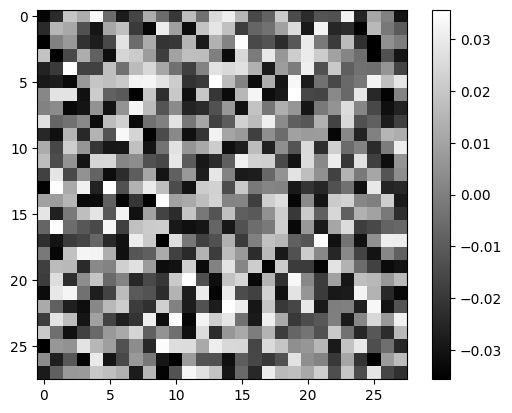

In [ ]:
weights = w.detach().numpy()
plt.imshow(weights[1,:].reshape(28,28),cmap='gray')
print(weights[1,:].reshape(28,28)[10,10])
plt.colorbar()
plt.show()

2.7266731e-05


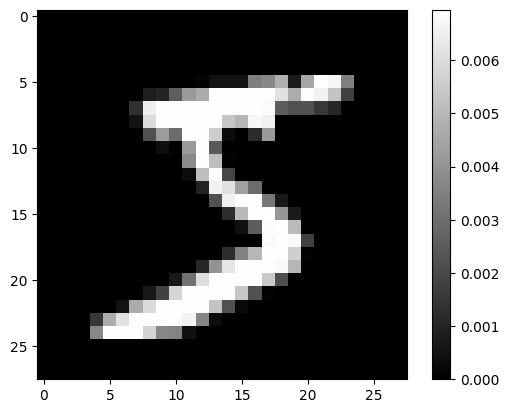

In [ ]:
plt.imshow(grad[1,:].reshape(28,28),cmap='gray')
print(grad[1,:].reshape(28,28)[10,10])
plt.colorbar()
plt.show()

step-2: Use the accumulated gradients to make an update

In [ ]:
optimizer.step()

0.027611531


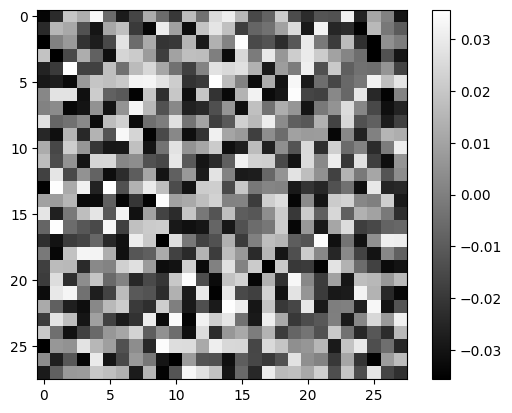

In [ ]:
weights = w.detach().numpy()
plt.imshow(weights[1,:].reshape(28,28),cmap='gray')
print(weights[1,:].reshape(28,28)[10,10])
plt.colorbar()
plt.show()

step-3: Set the accumulated gradients to zero

In [ ]:
optimizer.zero_grad()

# Let's build a two layer NN

 * Get the data
 * Create the DL architecture using nn.Module (using nested modules(layers) is allowed).
 * pass the `model.parameters()` to optimizer
 * Compute loss and call `loss.backward()` (it computes grad and accumulates it at the leaf nodes)
 * Call `optimizer.step()` to update parameters
 * Zero the accumulated gradients at the lead nodes using `optim.zero_grad()`

* There are two approaches to build NN. If the number of layers are small then we can make use of `nn.Sequential()` and keep adding layers (modules) as follows

* Note that, `nn.Sigmoid(),nn.Softmax()` are subclasses of` nn.Module`. They also use` torch.sigmoid()`,`torch.softmax()` in the forward method defined in the subclass

In [ ]:
model = nn.Sequential(nn.Linear(28 * 28, 20),nn.Sigmoid(),nn.Linear(20, 10),nn.Sigmoid(),nn.Softmax())

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=20, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Softmax(dim=None)
)


In [ ]:
print(model.parameters())

<generator object Module.parameters at 0x7f6313fe3eb0>


* The other (clean) way  of defining the model is subclassing `nn.Module `and nest the layers in the init method

* It is exactly like creating a class object. I mean you can define the init method to arguments if required. In such a case, we pass the constructor arguments during instantiation of the object.

In [ ]:
class FFN(nn.Module):

  def __init__(self):
    # All the stateful variables go here
    super(FFN, self).__init__()
    self.a1 = nn.Linear(28 * 28, 20)
    self.a2 = nn.Linear(20, 10)

  def forward(self,x):
    h1 = torch.sigmoid(self.a1(x.reshape(1,784)))
    h2 = torch.sigmoid(self.a2(h1))
    y_hat = F.softmax(h2,dim=1)

    return y_hat



In [ ]:
epochs = 100
model = FFN() # one time assignment
optimizer = optim.SGD(model.parameters(),lr=0.01) # intializing optimizer with parameters

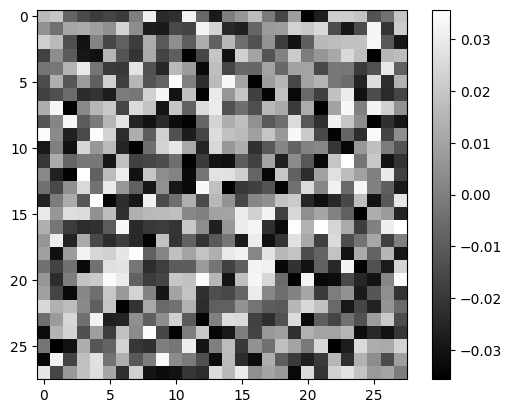

In [ ]:
w1,b1,w2,b2 = list(model.parameters())
weights = w1.detach().numpy()
plt.imshow(weights[1,:].reshape(28,28),cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
def train(x_train,model,optimizer):
  loss_trace = []
  for epoch in range(epochs):
    # Forward prop all training samples and accumulate gradients
    for i in range(len(x_train)):
      out = model(x_train[i])
      criterion = nn.CrossEntropyLoss()
      loss = criterion(out,y_train[i].reshape(1))
      loss.backward()
    loss_trace.append(loss.detach().item())
    print(f'Epoch:{epoch}, loss:{loss.detach().item()}')
    #update parameters
    optimizer.step()
    optimizer.zero_grad
  return loss_trace

In [ ]:
loss_trace = train(x_train,model,optimizer)

Epoch:0, loss:2.2995896339416504
Epoch:1, loss:2.2997188568115234
Epoch:2, loss:2.299983024597168
Epoch:3, loss:2.3003907203674316
Epoch:4, loss:2.300947666168213
Epoch:5, loss:2.301645517349243
Epoch:6, loss:2.3024520874023438
Epoch:7, loss:2.303295373916626
Epoch:8, loss:2.3040578365325928
Epoch:9, loss:2.3045709133148193
Epoch:10, loss:2.3046226501464844
Epoch:11, loss:2.3039674758911133
Epoch:12, loss:2.302342653274536
Epoch:13, loss:2.299494981765747
Epoch:14, loss:2.2952258586883545
Epoch:15, loss:2.2894601821899414
Epoch:16, loss:2.2823145389556885
Epoch:17, loss:2.274127960205078
Epoch:18, loss:2.2653908729553223
Epoch:19, loss:2.2565691471099854
Epoch:20, loss:2.247943639755249
Epoch:21, loss:2.239598035812378
Epoch:22, loss:2.2315526008605957
Epoch:23, loss:2.223904609680176
Epoch:24, loss:2.216843366622925
Epoch:25, loss:2.2105588912963867
Epoch:26, loss:2.2051637172698975
Epoch:27, loss:2.2006518840789795
Epoch:28, loss:2.1968846321105957
Epoch:29, loss:2.193680763244629
Ep

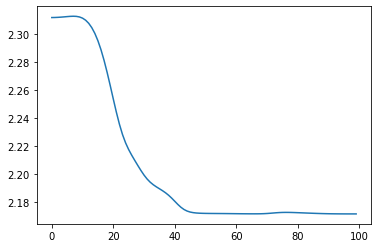

In [ ]:
from matplotlib import pyplot as plt
plt.plot(loss_trace)
plt.show()

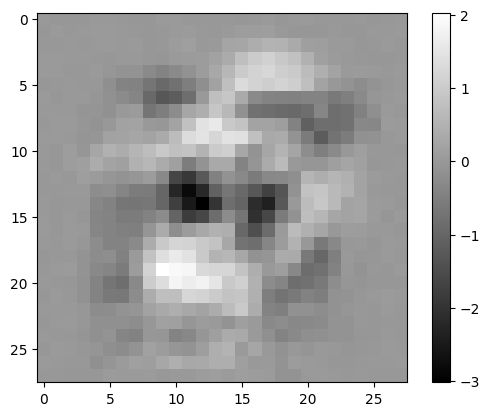

In [ ]:
w1,b1,w2,b2 = list(model.parameters())
weights = w1.detach().numpy()
plt.imshow(weights[3,:].reshape(28,28),cmap='gray')
plt.colorbar()
plt.show()

* For training, we could have used **batch of samples** instead of one sample at a time and also we didn't shuffle the samples.
* We could write functions to acheive it.
* However, pytorch provides utils for these routine tasks.